# Feature Selection

## Importing Dataset

In [0]:
# data analysis packages
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/more_even_dataset")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
full_path = './botiot_full_sampled.csv'

full_df = pd.read_csv(full_path)
df = full_df.drop(columns=['Unnamed: 0'])
df.shape

(76967, 22)

# Dataset Classes

This version of dataset contains classes for all eleven subcategories of data:



Information Gathering
1. Service Scanning
2. OS Fingerprinting

Denial of Service
DDoS
3. TCP
4. UDP
5. HTTP
DoS
6. TCP
7. UDP
8. HTTP

9. Normal

Information Theft
10. Keylogging
11. Data Theft


In [0]:
norm = len(df[df['subcategory_number'] == 0])

ss = len(df[df['subcategory_number'] == 1])
osf = len(df[df['subcategory_number'] == 2])

dd_t = len(df[df['subcategory_number'] == 3])
dd_u = len(df[df['subcategory_number'] == 4])
dd_h = len(df[df['subcategory_number'] == 5])

d_t = len(df[df['subcategory_number'] == 6])
d_u = len(df[df['subcategory_number'] == 7])
d_h = len(df[df['subcategory_number'] == 8])

key = len(df[df['subcategory_number'] == 9])
dex = len(df[df['subcategory_number'] == 10])

sub_cats = [ss, osf, dd_t, dex, dd_u, dd_h, d_t, d_h,d_u, norm, key]

total = np.sum(sub_cats)
sub_cats_percentage = []
for i in range(len(sub_cats)):
  sub_cats_percentage.append((sub_cats[i]/total)*100)

In [0]:
sub_cats

[8780, 8240, 8796, 118, 8534, 8304, 8621, 8318, 8264, 7523, 1469]

In [0]:
sub_cats_percentage

[11.407486325308248,
 10.705886938558082,
 11.428274455286031,
 0.1533124585861473,
 11.08786882689984,
 10.789039458469214,
 11.200904283654033,
 10.807229072199775,
 10.737069133524757,
 9.774318863928697,
 1.908610183585173]

Due to the lack of samples, which leads to less capable models to predict accurate results, both the information theft classes of keylogging and data exfiltration are removed and a new dataframe is created without them

In [0]:
norm = df[df['subcategory_number'] == 0]

serv = df[df['subcategory_number'] == 1]

os = df[df['subcategory_number'] == 2]

ddos_tcp = df[df['subcategory_number'] == 3]
ddos_udp = df[df['subcategory_number'] == 4]
ddos_http = df[df['subcategory_number'] == 5]

dos_tcp = df[df['subcategory_number'] == 6]
dos_udp = df[df['subcategory_number'] == 7]
dos_http = df[df['subcategory_number'] == 8]

frames = [norm, serv, os, ddos_tcp, ddos_udp, ddos_http, dos_tcp, dos_udp, dos_http]
full_df = pd.concat(frames)
full_df.shape

(75380, 22)

# Class Representation

In [0]:
norm = len(df[df['subcategory_number'] == 0])

ss = len(df[df['subcategory_number'] == 1])
osf = len(df[df['subcategory_number'] == 2])

dd_t = len(df[df['subcategory_number'] == 3])
dd_u = len(df[df['subcategory_number'] == 4])
dd_h = len(df[df['subcategory_number'] == 5])

d_t = len(df[df['subcategory_number'] == 6])
d_u = len(df[df['subcategory_number'] == 7])
d_h = len(df[df['subcategory_number'] == 8])

sub_cats = [ss, osf, dd_t, dd_u, dd_h, d_t, d_h,d_u, norm]

total = np.sum(sub_cats)
sub_cats_percentage = []
for i in range(len(sub_cats)):
  sub_cats_percentage.append((sub_cats[i]/total)*100)
  
sub_cats_percentage = np.around(sub_cats_percentage, decimals=4)

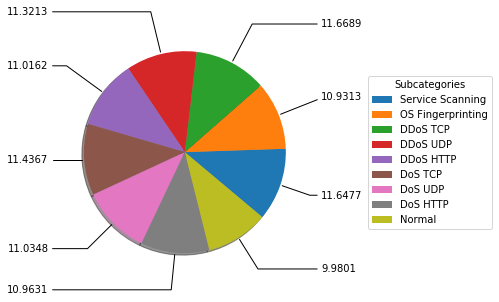

In [0]:
#labels added with lines from: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

import matplotlib.pyplot as plt

labels = 'Service Scanning', 'OS Fingerprinting', 'DDoS TCP', 'DDoS UDP', 'DDoS HTTP', 'DoS TCP', 'DoS UDP', 'DoS HTTP', 'Normal', 'Keylogging', 'Data Exfiltration'

sizes = sub_cats_percentage

#fig1, ax1 = plt.subplots()

fig1 = plt.figure(figsize=(4,4))
ax1  = fig1.add_subplot(111)

#wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.4f%%',shadow=True, textprops=dict(color="k"), startangle=-40)

wedges, texts = ax1.pie(sizes,shadow=True,textprops=dict(color="k"), startangle=-40)

kw = dict(arrowprops=dict(arrowstyle="-"))

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(sizes[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
    horizontalalignment=horizontalalignment, **kw)

ax1.legend(wedges, labels,
          title="Subcategories",
          loc="center left",
          bbox_to_anchor=(1.3, 0, 0.5, 1))

ax1.axis('equal')

plt.show()

In [0]:
#fig1.savefig('class_distro.png')

# Feature Evaluation

**Calculating Mutual Information Matrix for all features for the target variable of the labels**

In [0]:
from sklearn.feature_selection import mutual_info_classif

X = full_df.drop(['subcategory_number'],axis=1)

y = full_df['subcategory_number']

botiot_mutual_information = mutual_info_classif(X, y)

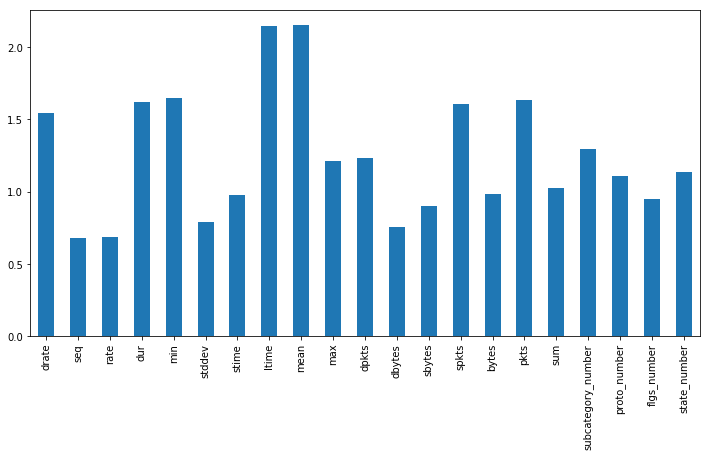

In [0]:
pd.Series(botiot_mutual_information, index=full_df.columns[1:]).plot.bar(figsize=(12, 6))

In [0]:
full_path = './full_feature_evaluation.csv'

resource_df = pd.read_csv(full_path)
resource_df = resource_df.drop(columns=['Unnamed: 0'])
resource_df.head()

,Feature,CPUs Utilized,Execution Time (s),Maximum resident set size (Kbytes)
0,srate,0.966,0.055,3856
1,drate,0.832,0.053,3796
2,seq,0.961,0.050,3712
3,max,0.965,0.052,3712
4,min,0.964,0.052,3860


# Graphing Feature Metrics

In [0]:
feat = resource_df['Feature'].values
exet = resource_df['Execution Time (s)'].values
cpu = resource_df['CPUs Utilized'].values
ram = resource_df['Maximum resident set size (Kbytes)'].values

#changing the scale of the 1D arrays to better visually represent them
exet_scaled = np.interp(exet, (exet.min(), exet.max()), (-1, +1))
cpu_scaled = np.interp(cpu, (cpu.min(), cpu.max()), (-1, +1))
ram_scaled = np.interp(ram, (ram.min(), ram.max()), (-1, +1))
mi_scaled = np.interp(botiot_mutual_information, (botiot_mutual_information.min(), botiot_mutual_information.max()), (-1, +1))

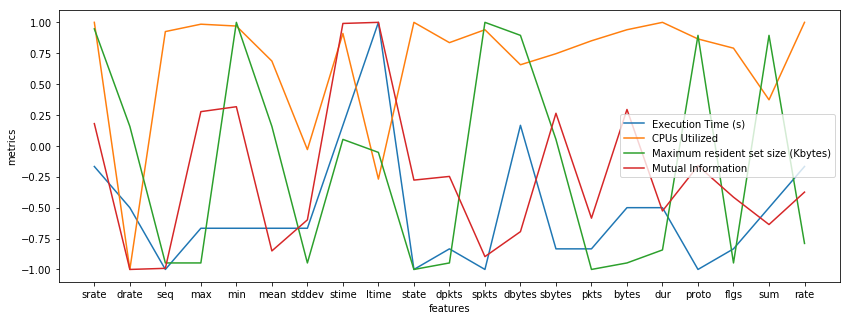

In [0]:
from matplotlib import pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(feat, exet_scaled, label='Execution Time (s)')
plt.plot(feat, cpu_scaled, label='CPUs Utilized')
plt.plot(feat, ram_scaled, label='Maximum resident set size (Kbytes)')
plt.plot(feat, mi_scaled, label='Mutual Information')

plt.legend(loc='best')

plt.ylabel('metrics')
plt.xlabel('features')
plt.show()

**Clearly, trying to distingust a compromise between all three resource utilisation features and mutual information is difficult**

**However, since the best performing of all three of the resource features is the one with the lowest values, an aggregate resource metrics can be created from the three original ones**

In [0]:
ag_df = resource_df.drop(columns=['Feature'])

#aggregating the three resource metrics into one value per feature
agg = (ag_df.agg("sum", axis="columns")).values

#scaling the values for graphing purposes
agg_scaled = np.interp(agg, (agg.min(), agg.max()), (-1, +1))

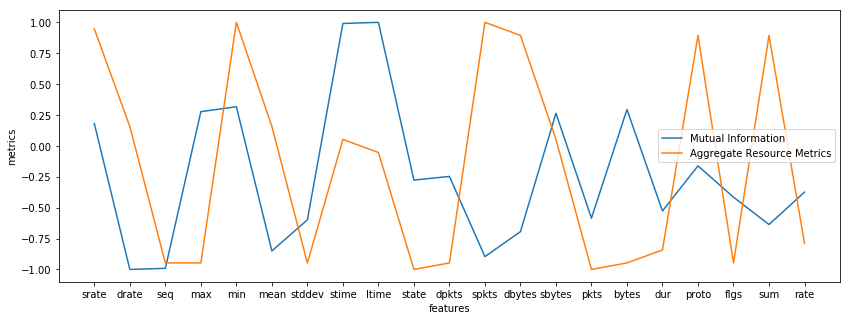

In [0]:

plt.figure(figsize=(14,5))
plt.plot(feat, mi_scaled, label='Mutual Information')
plt.plot(feat, agg_scaled, label='Aggregate Resource Metrics')

plt.legend()

plt.ylabel('metrics')
plt.xlabel('features')
plt.show()

Therefore from the graph, features selected are:


1.   bytes
2.   dur
3.   mean
4.   dpkts
5.   proto
6.   flgs
7.   state
8.   sbytes




In [0]:
feat_df['subcategory_number'].unique()
#all ltime values are large


array([3, 0, 1, 2, 7, 6, 8, 4, 5])

In [0]:
#exporting csv with just these features
#feat_df = full_df[['subcategory_number', 'srate', 'drate', 'mean', 'dpkts', 'spkts', 'dbytes', 'sbytes', 'proto_number', 'flgs_number', 'sum']]

#feat_df = full_df[['subcategory_number', 'ltime', 'dur', 'mean', 'dpkts', 'proto_number', 'flgs_number', 'state_number',  'sbytes']]

feat_df = full_df[['subcategory_number', 'bytes', 'dur', 'mean', 'dpkts', 'proto_number', 'flgs_number', 'state_number',  'sbytes']]

#shuffling dataset
feat_df = feat_df.sample(frac=1)

feat_df.to_csv('botiot_8_features.csv')
